# Problem 1: Linear Regression

You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. 
You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

### Data Dictionary:

1. Carat	 Carat weight of the cubic zirconia.
2. Cut	 :    Describe the cut quality of the cubic zirconia.Quality is increasing order Fair, Good, Very Good, Premium, Ideal.
3. Color :	 Colour of the cubic zirconia.With D being the worst and J the best.
4. Clarity	: cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. In order from Worst to Best) IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1
5. Depth	: The Height of cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.
6. Table  :	 The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.
7. Price :	 the Price of the cubic zirconia.
8. X  :	 Length of the cubic zirconia in mm.
9. Y   :	 Width of the cubic zirconia in mm.
10. Z	:  Height of the cubic zirconia in mm.




In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt  
import matplotlib.style
%matplotlib inline 
import math
import missingno as msno
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as ss
from sklearn import metrics
from sklearn.preprocessing import FunctionTransformer   
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
import warnings
warnings.filterwarnings("ignore") 
my_colors = ['#d3d3d3','#d1a163','#7a7a7a','#d4a07d','#ffbf65','#202020']



## 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

In [2]:
df=pd.read_csv("cubic_zirconia.csv")

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [5]:
df.shape

(26967, 11)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967.0,13484.000000,7784.846691,1.0,6742.50,13484.00,20225.50,26967.00
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [7]:
df_a=df.drop('Unnamed: 0',axis=1)

In [8]:
df_a


,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [9]:
dups = df_a.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df_a.shape)

Number of duplicate rows = 34
(26967, 10)


In [10]:
print('Before drop',df_a.shape)
df_a.drop_duplicates(inplace=True) 
print('After drop',df_a.shape)

Before drop (26967, 10)
After drop (26933, 10)


In [11]:
dups = df_a.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df_a.shape)

Number of duplicate rows = 0
(26933, 10)


<AxesSubplot:>

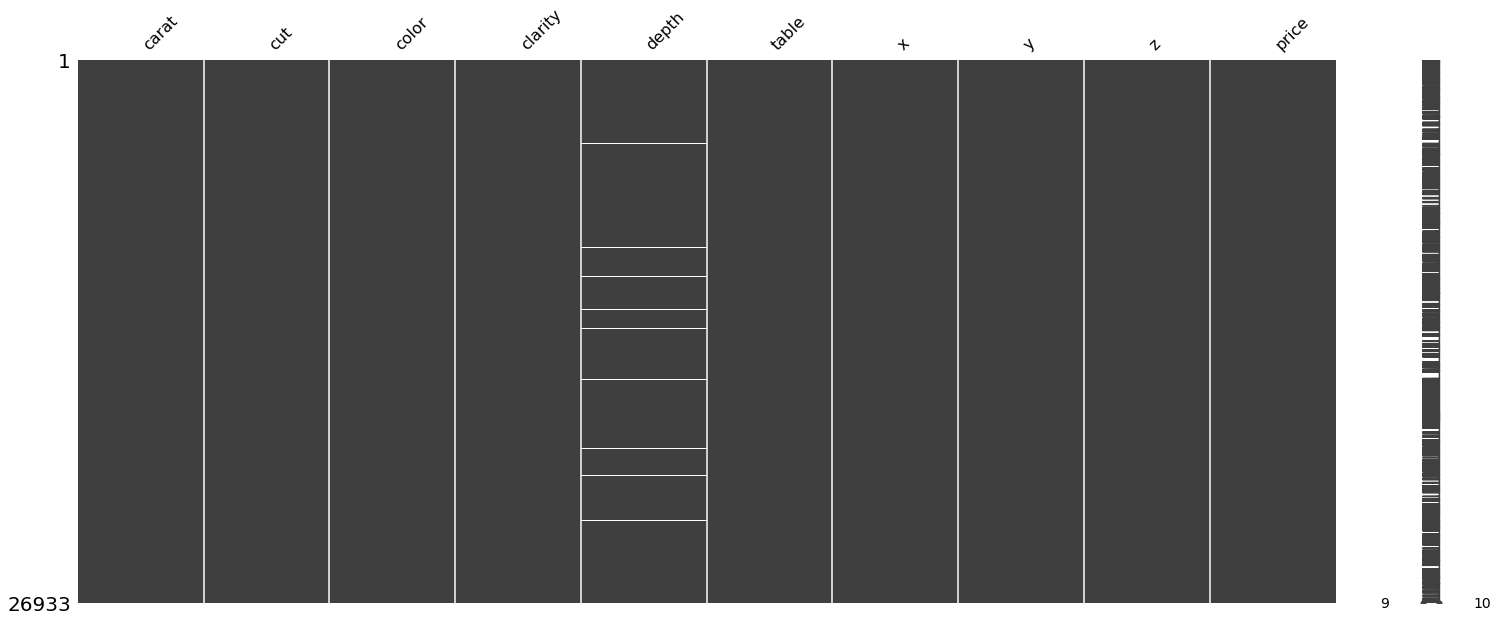

In [12]:
msno.matrix(df_a)

In [13]:
df_a.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [14]:
df_a.isnull().sum()/df_a.isnull().sum().sum()*100

carat        0.0
cut          0.0
color        0.0
clarity      0.0
depth      100.0
table        0.0
x            0.0
y            0.0
z            0.0
price        0.0
dtype: float64

In [15]:
def dist_box(data):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig,(ax_box,ax_dis,ax_skew)  =plt.subplots(nrows=3,sharex=True,gridspec_kw = {"height_ratios": (.55, 2,2)},figsize=(10, 6))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    sns.set_theme(style="white")
    fig.suptitle("SPREAD AND SKEWNESS OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="#d3d3d3",ax=ax_box)
    ax_box.set(xlabel='')

    sns.despine(top=True,right=True,left=True) 
    sns.histplot(data,color='#d1a163',ax=ax_dis,kde=False)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='b', linestyle='-',linewidth=2)
    ax_dis.legend({'Mean':mean,'Median':median,'Mode':mode})
    
    sns.despine(top=True,right=True,left=True) 
    sns.distplot(data, color="m", kde=True,ax=ax_skew,label="Skewness : %.2f"%(data.skew()))
    ax_skew.legend(loc="best")
    plt.show()
    
                 

In [16]:
df_a.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

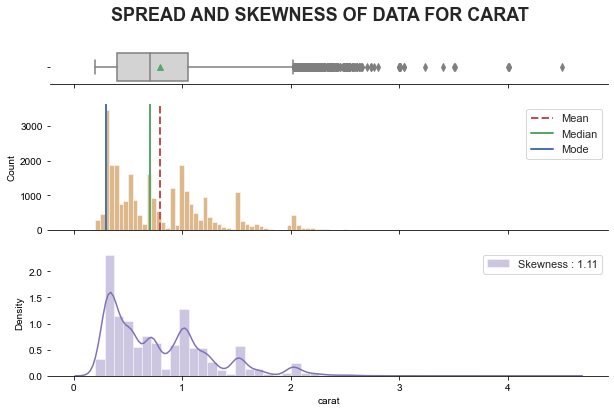

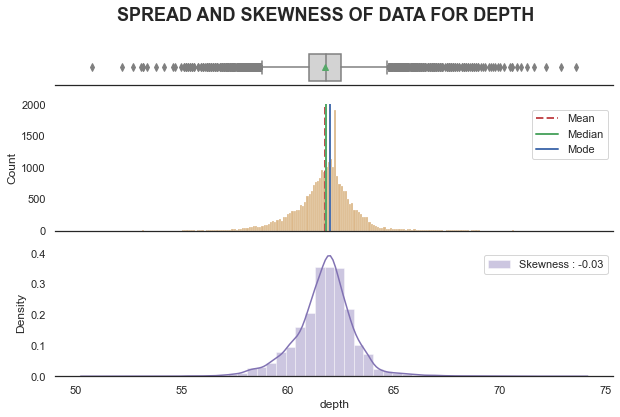

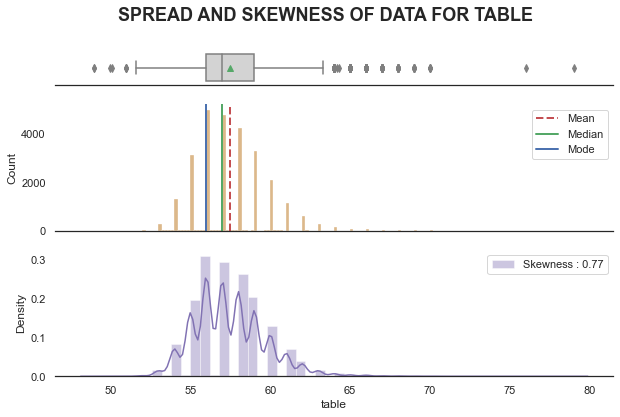

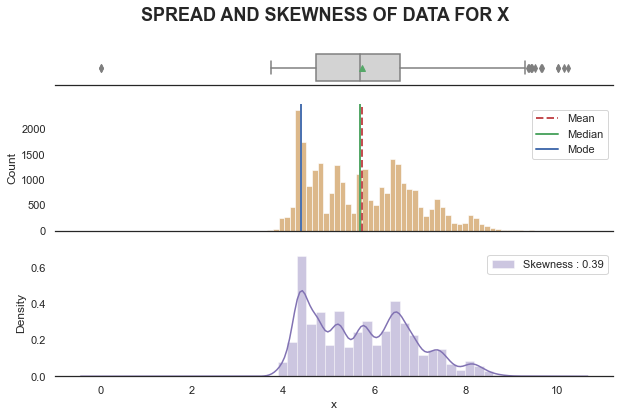

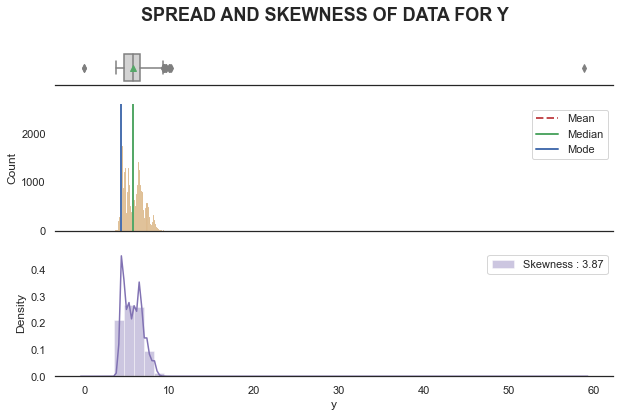

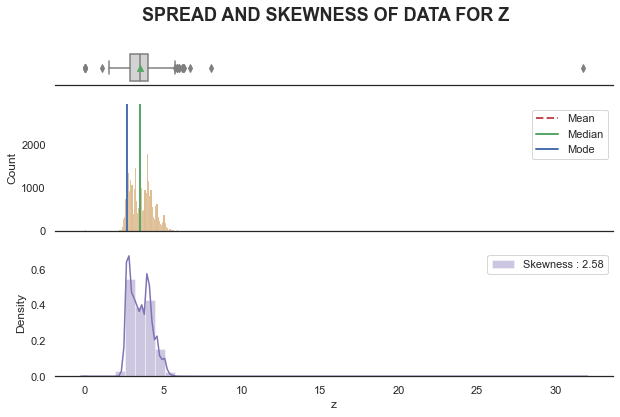

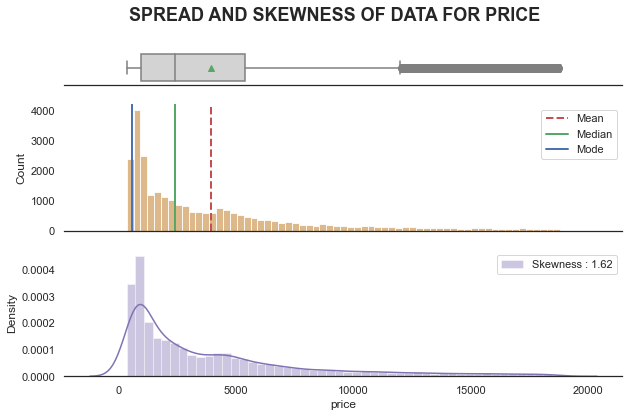

In [17]:
list_col=  ['carat', 'depth', 'table', 'x','y','z',
       'price']
for i in range(len(list_col)):
    dist_box(df_a[list_col[i]])

In [18]:
def bivariateAnalysis_categorical(column):
    
    plt.figure(figsize=(10,6))
    print("Countplot of " + column)
    print("----------------------------------------------------------------------------")
    a=sns.countplot(data = df_ct[column], x = df_ct[column])
    for bar in a.patches:
            a.annotate(format(bar.get_height(),'.1f'),
                 (bar.get_x()+bar.get_width()/2,
                 bar.get_height()),ha='center',va='center',size=15,xytext=(0,8),textcoords='offset pixels')
            a.spines['top'].set_visible(False)
            a.spines['right'].set_visible(False)
    plt.tight_layout
    plt.show()
    
    plt.figure(figsize=(10,6))
    print("Boxplot of " + column)
    print("----------------------------------------------------------------------------")
    sns.boxplot(data = df_ct, x=df_ct[column],y=df_a['price'])
    plt.show()
    




In [19]:
df_a.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [20]:
df_ct = df_a.select_dtypes(include = ['object'])
lstcatcolumns = list(df_ct.columns.values)
len(lstcatcolumns)

3

Countplot of cut
----------------------------------------------------------------------------


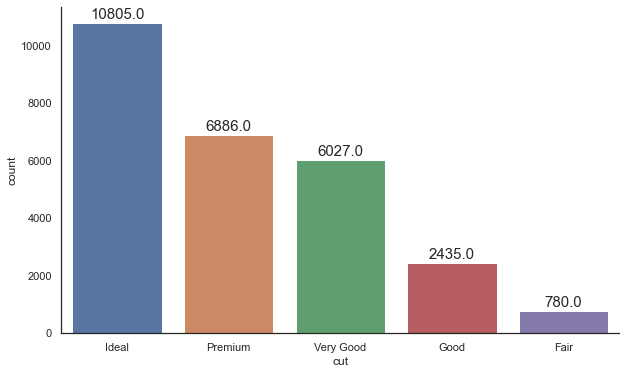

Boxplot of cut
----------------------------------------------------------------------------


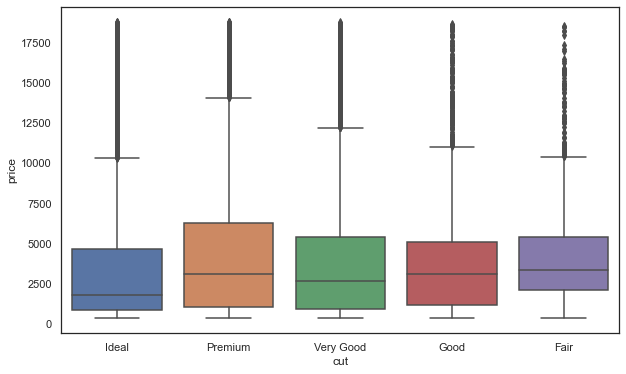

Countplot of color
----------------------------------------------------------------------------


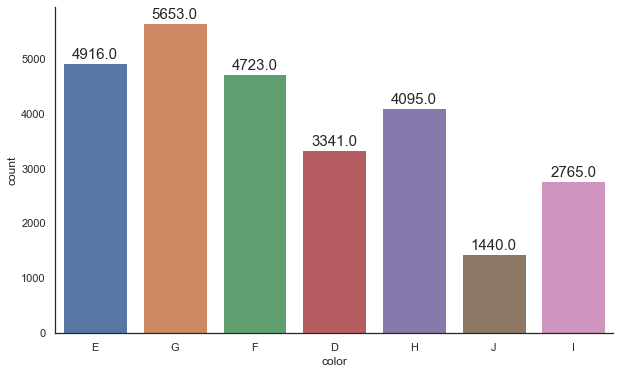

Boxplot of color
----------------------------------------------------------------------------


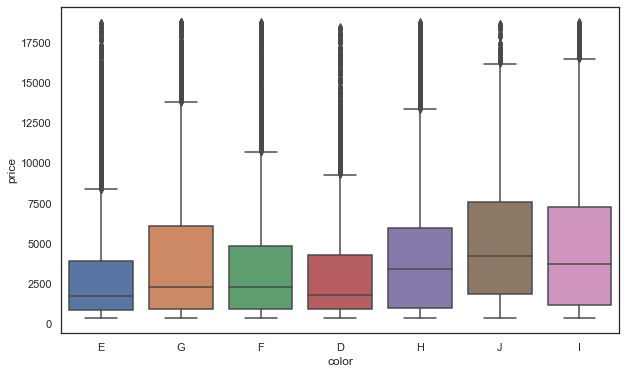

Countplot of clarity
----------------------------------------------------------------------------


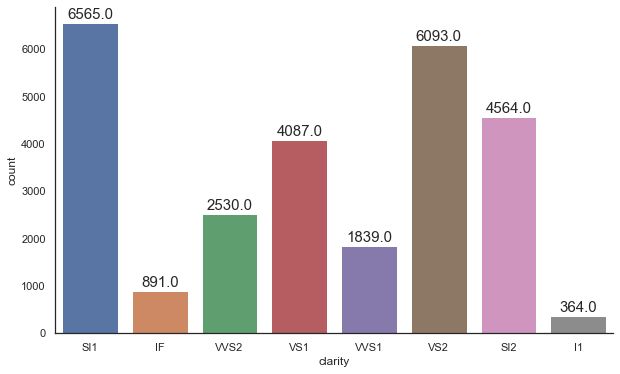

Boxplot of clarity
----------------------------------------------------------------------------


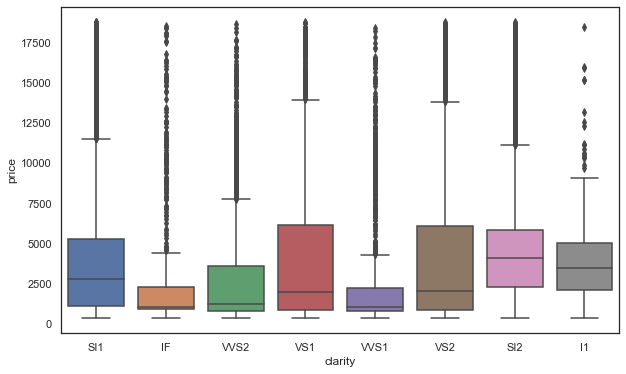

In [21]:
for x in lstcatcolumns:
    bivariateAnalysis_categorical(x)

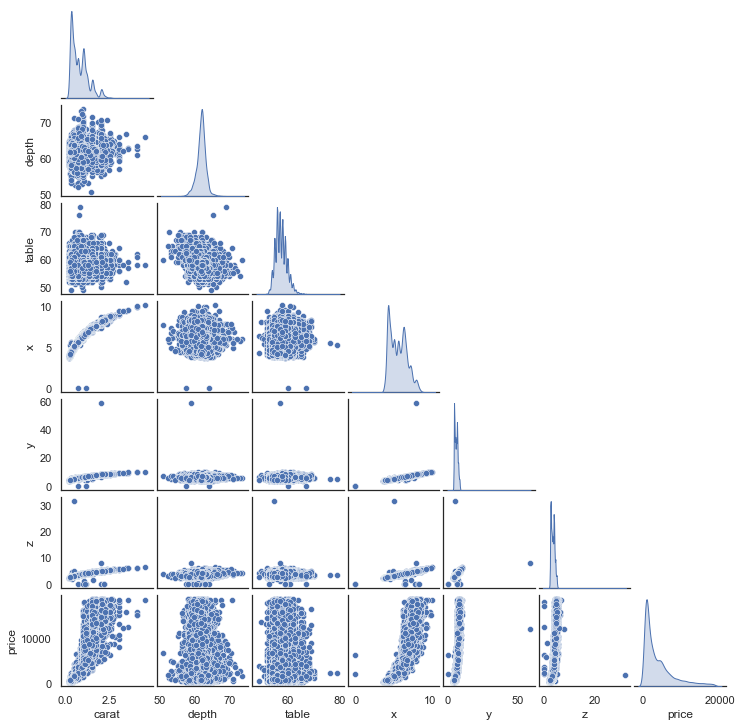

In [22]:
p=sns.pairplot(data=df_a,diag_kind='kde',corner=True,)
p.fig.set_size_inches(10,10)

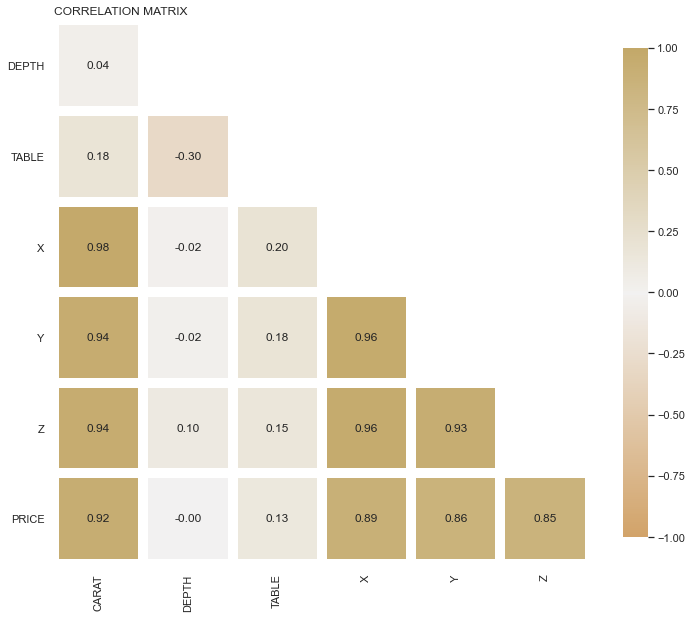

In [23]:
corr=df.corr()

items = df_a[df_a.columns[:df_a.columns.size]]
items_corr=items.corr()


fig, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(items_corr, dtype=bool))
mask = mask[1:, :-1]
corr = items.corr().iloc[1:,:-1].copy()

cmap1 = sns.diverging_palette(51,65, 62,70, as_cmap=True)

_=sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
           linewidths=9, cmap=cmap1, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .9}, square=False)
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0
           
          )
plt.xticks(plt.xticks()[0], labels=xticks,rotation=90)
title = 'CORRELATION MATRIX';
plt.title(title, fontsize=12,loc='left');



In [24]:
df_out=df_a.copy()


In [25]:
def outliers(data):
        outliers_num = data.loc[:,data.columns != 'class']
        Q1 = outliers_num.quantile(0.25)
        Q3 =  outliers_num.quantile(0.75)
        IQR = Q3-Q1
        count = 0
        
        outliers_num_test = ((outliers_num <(Q1-1.5 * IQR)) | (outliers_num > (Q3+1.5 * IQR)))
        for col in outliers_num_test:
            if(1 in outliers_num_test[col].value_counts().index):
                print ("No. of outliers in %s: %d"% (col,outliers_num_test[col].value_counts().iloc[1]))
                count +=1
        print("\n\nNo of attributes with outliers are :", count)
outliers(df_out)

No. of outliers in carat: 657
No. of outliers in depth: 1219
No. of outliers in price: 1778
No. of outliers in table: 318
No. of outliers in x: 14
No. of outliers in y: 14
No. of outliers in z: 22


No of attributes with outliers are : 7


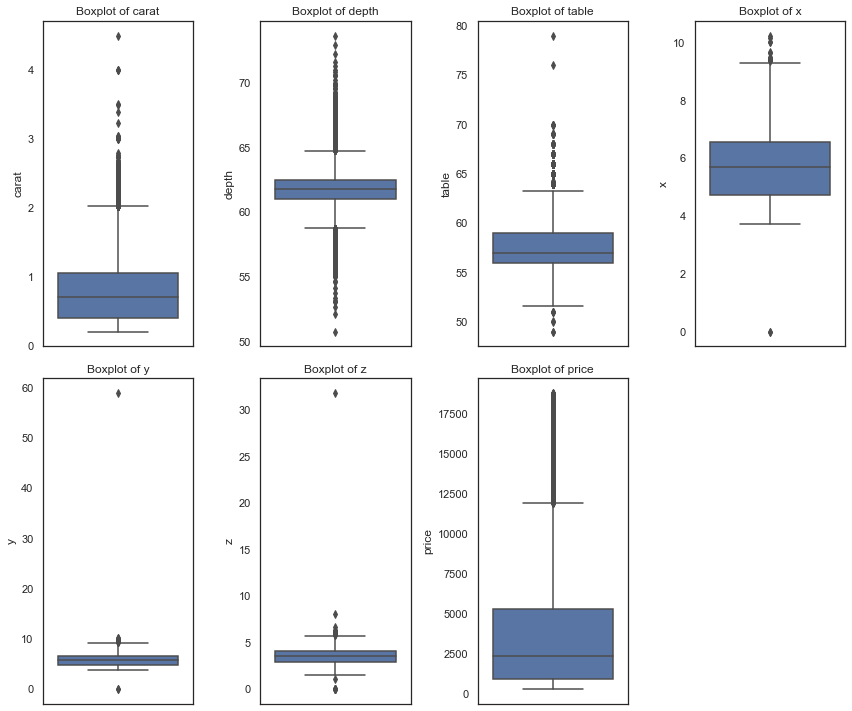

In [26]:
#Checking the outliers
plt.figure(figsize = (12,15))
feature_list = ['carat', 'depth', 'table','x','y','z' ,
       'price']
for i in range(len(feature_list)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y = df_out[feature_list[i]], data = df_out)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [27]:
#Define a function which returns the Upper and Lower limit to detect outliers for each feature
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range   

In [28]:

#Cap & floor the values beyond the outlier boundaries
for i in feature_list:
    LL, UL = remove_outlier(df_out[i])
    df_out[i] = np.where(df_out[i] > UL, UL, df_out[i])
    df_out[i] = np.where(df_out[i] < LL, LL, df_out[i])

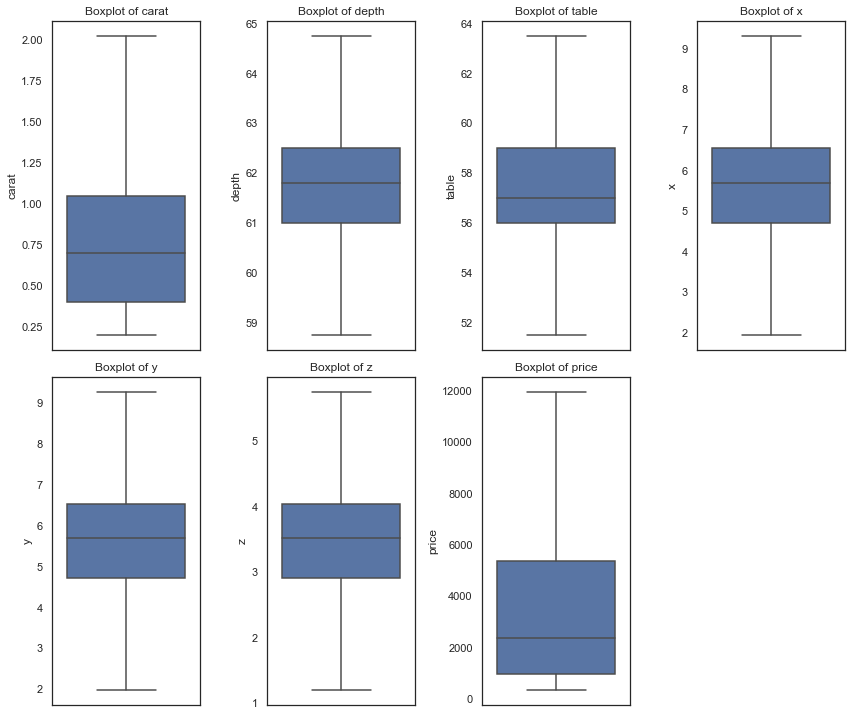

In [29]:
#Check to verify if outliers have been treated
plt.figure(figsize = (12,15))

for i in range(len(feature_list)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y = df_out[feature_list[i]], data = df_out)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [30]:
#verifying the outliers treatment
def outliers(data):
        outliers_num = data.loc[:,data.columns != 'class']
        Q1 = outliers_num.quantile(0.25)
        Q3 =  outliers_num.quantile(0.75)
        IQR = Q3-Q1
        count = 0
        
        outliers_num_test = ((outliers_num <(Q1-1.5 * IQR)) | (outliers_num > (Q3+1.5 * IQR)))
        for col in outliers_num_test:
            if(1 in outliers_num_test[col].value_counts().index):
                print ("No. of outliers in %s: %d"% (col,outliers_num_test[col].value_counts().iloc[1]))
                count +=1
        print("\n\nNo of attributes with outliers are :", count)
outliers(df_out)



No of attributes with outliers are : 0


## 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

In [31]:
df_a[df_a.isin([0])].stack(0)

5821   x    0.0
       y    0.0
       z    0.0
6034   z    0.0
10827  z    0.0
12498  z    0.0
12689  z    0.0
17506  x    0.0
       y    0.0
       z    0.0
18194  z    0.0
23758  z    0.0
dtype: object

In [32]:
df_a.loc[((df_a['x'] == 0) | (df_a['y'] == 0) | (df_a['z'] == 0))]



,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [33]:
#df_nzero=df_out.loc[(df_out[['x','y','z']]!=0).all(axis=1)]

In [34]:
df_nzero=df_out.copy()

In [35]:
for column in df_nzero.columns:
    if df_nzero[column].dtype != 'object':
        median = df_nzero[column].median()
        df_nzero[column] = df_nzero[column].fillna(median)    
        
df_nzero.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [36]:
df_nzero.describe()

,carat,depth,table,x,y,z,price
count,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
mean,0.793298,61.745589,57.435544,5.729323,5.731255,3.536928,3735.832213
std,0.462127,1.243152,2.157119,1.126175,1.118155,0.696753,3468.207359
min,0.200000,58.750000,51.500000,1.950000,1.965000,1.190000,326.000000
25%,0.400000,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000
max,2.025000,64.750000,63.500000,9.310000,9.285000,5.750000,11972.500000


## 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

#for feature in df_nzero.columns: 
    if df_nzero[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df_nzero[feature].unique()))
        print(pd.Categorical(df_nzero[feature].unique()).codes)
        df_nzero[feature] = pd.Categorical(df_nzero[feature]).codes

In [37]:
df_nzero['cut']=np.where(df_nzero['cut'] =='Ideal', '4', df_nzero['cut'])
df_nzero['cut']=np.where(df_nzero['cut'] =='Premium', '3', df_nzero['cut'])
df_nzero['cut']=np.where(df_nzero['cut'] =='Very Good', '2', df_nzero['cut'])
df_nzero['cut']=np.where(df_nzero['cut'] =='Good', '1', df_nzero['cut'])
df_nzero['cut']=np.where(df_nzero['cut'] =='Fair', '0', df_nzero['cut'])

In [38]:
df_nzero['color']=np.where(df_nzero['color'] =='D', '6', df_nzero['color'])
df_nzero['color']=np.where(df_nzero['color'] =='E', '5', df_nzero['color'])
df_nzero['color']=np.where(df_nzero['color'] =='F', '4', df_nzero['color'])
df_nzero['color']=np.where(df_nzero['color'] =='G', '3', df_nzero['color'])
df_nzero['color']=np.where(df_nzero['color'] =='H', '2', df_nzero['color'])
df_nzero['color']=np.where(df_nzero['color'] =='I', '1', df_nzero['color'])
df_nzero['color']=np.where(df_nzero['color'] =='J', '0', df_nzero['color'])

In [39]:
df_nzero['clarity']=np.where(df_nzero['clarity'] =='IF', '7', df_nzero['clarity'])
df_nzero['clarity']=np.where(df_nzero['clarity'] =='VVS1', '6', df_nzero['clarity'])
df_nzero['clarity']=np.where(df_nzero['clarity'] =='VVS2', '5', df_nzero['clarity'])
df_nzero['clarity']=np.where(df_nzero['clarity'] =='VS1', '4', df_nzero['clarity'])
df_nzero['clarity']=np.where(df_nzero['clarity'] =='VS2', '3', df_nzero['clarity'])
df_nzero['clarity']=np.where(df_nzero['clarity'] =='SI1', '2', df_nzero['clarity'])
df_nzero['clarity']=np.where(df_nzero['clarity'] =='SI2', '1', df_nzero['clarity'])
df_nzero['clarity']=np.where(df_nzero['clarity'] =='I1', '0', df_nzero['clarity'])

In [40]:
df_nzero['cut'] = df_nzero['cut'].astype('float64')
df_nzero['color'] = df_nzero['color'].astype('float64')
df_nzero['clarity'] = df_nzero['clarity'].astype('float64')

In [41]:
# Transform

In [42]:
log_transformer = FunctionTransformer(np.log1p,inverse_func=np.exp)
log_transformer

FunctionTransformer(func=<ufunc 'log1p'>, inverse_func=<ufunc 'exp'>)

In [43]:
df_nzero['log_price'] = log_transformer.fit_transform(df_nzero[['price']])

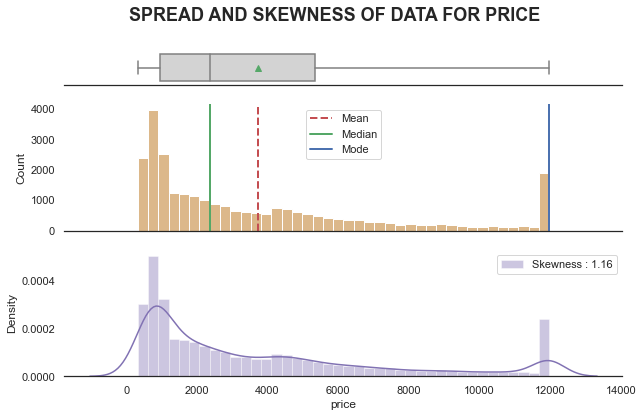

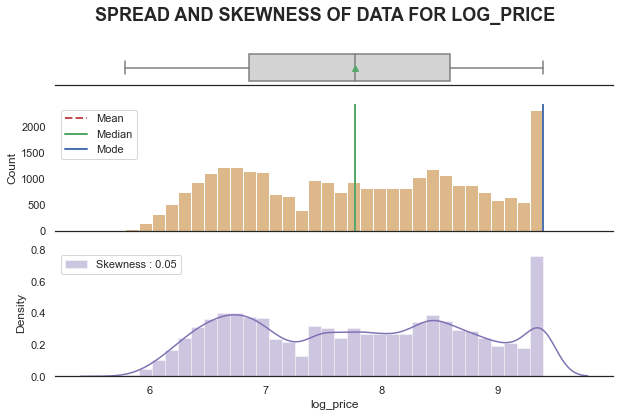

In [44]:
dist_box(df_nzero['price'])
dist_box(df_nzero['log_price'])

In [45]:
X = df_nzero.drop('log_price', axis=1)
y = df_nzero[['log_price']]
X.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,4.0,5.0,2.0,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,3.0,3.0,7.0,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,2.0,5.0,5.0,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,4.0,4.0,4.0,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,4.0,4.0,6.0,60.4,59.0,4.35,4.43,2.65,779.0


In [46]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [47]:
i=0
for column in df_out.columns:
    if i < 11:
        print (column ,"--->",  round(vif[i],4))
        i = i+1

carat ---> 192.7361
cut ---> 9.8607
color ---> 6.8455
clarity ---> 8.1608
depth ---> 956.8369
table ---> 755.2604
x ---> 10375.7621
y ---> 9380.4023
z ---> 1999.6219
price ---> 31.3702


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [49]:
X_train = X_train.drop(['price'], axis=1)
X_test = X_test.drop(['price'], axis=1)

In [50]:
rm = LinearRegression()
rm.fit(X_train , y_train)
#accuracies = cross_val_score(estimator = clf_lr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred_test = rm.predict(X_test)
y_pred_train = rm.predict(X_train)
print('')
print('####### Linear Regression #######')
print('Score : %.4f' % rm.score(X_test, y_test))
print('Intercept : %.4f' % rm.intercept_[0] )
#print(accuracies)

mse1 = mean_squared_error(y_train, y_pred_train)
mae1 = mean_absolute_error(y_train, y_pred_train)
rmse1 = mean_squared_error(y_train, y_pred_train)**0.5
r2_1 = r2_score(y_train, y_pred_train)

    
print('')
print('////Training////')
print('MSE    : %0.4f ' % mse1)
print('MAE    : %0.4f ' % mae1)
print('RMSE   : %0.4f ' % rmse1)
print('R2     : %0.4f ' % r2_1)




mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = mean_squared_error(y_test, y_pred_test)**0.5
r2 = r2_score(y_test, y_pred_test)
 
    
print('')
print('////Testing////')
print('MSE    : %0.4f ' % mse)
print('MAE    : %0.4f ' % mae)
print('RMSE   : %0.4f ' % rmse)
print('R2     : %0.4f ' % r2)





####### Linear Regression #######
Score : 0.9686
Intercept : -4.3822

////Training////
MSE    : 0.0295 
MAE    : 0.1220 
RMSE   : 0.1717 
R2     : 0.9701 

////Testing////
MSE    : 0.0311 
MAE    : 0.1241 
RMSE   : 0.1764 
R2     : 0.9686 


In [51]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, rm.coef_[0][idx]))

The coefficient for carat is -1.2499673711209633
The coefficient for cut is 0.023899488716310945
The coefficient for color is 0.07661181089146749
The coefficient for clarity is 0.11739066301254741
The coefficient for depth is 0.05696711664637572
The coefficient for table is 0.01084855256994461
The coefficient for x is 0.8333011521043376
The coefficient for y is 0.4781174266888868
The coefficient for z is 0.22579347324221866


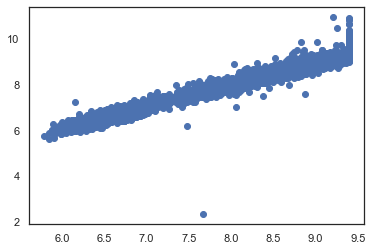

In [52]:
y_pred = rm.predict(X_test)
plt.scatter(y_test['log_price'], y_pred)

In [53]:
from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [54]:
rm = LinearRegression()
rm.fit(X_train_scaled , y_train_scaled)
#accuracies = cross_val_score(estimator = clf_lr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred_test = rm.predict(X_test_scaled)
y_pred_train = rm.predict(X_train_scaled)
print('')
print('####### Linear Regression - Scaled Data #######')
print('Score : %.4f' % rm.score(X_test_scaled, y_test_scaled))
print('Intercept :' ,rm.intercept_[0] )
#print(accuracies)

mse1 = mean_squared_error(y_train_scaled, y_pred_train)
mae1 = mean_absolute_error(y_train_scaled, y_pred_train)
rmse1 = mean_squared_error(y_train_scaled, y_pred_train)**0.5
r2_1 = r2_score(y_train_scaled, y_pred_train)

    
print('')
print('////Training////')
print('MSE    : %0.4f ' % mse1)
print('MAE    : %0.4f ' % mae1)
print('RMSE   : %0.4f ' % rmse1)
print('R2     : %0.4f ' % r2_1)




mse = mean_squared_error(y_test_scaled, y_pred_test)
mae = mean_absolute_error(y_test_scaled, y_pred_test)
rmse = mean_squared_error(y_test_scaled, y_pred_test)**0.5
r2 = r2_score(y_test_scaled, y_pred_test)
 
    
print('')
print('////Testing////')
print('MSE    : %0.4f ' % mse)
print('MAE    : %0.4f ' % mae)
print('RMSE   : %0.4f ' % rmse)
print('R2     : %0.4f ' % r2)






####### Linear Regression - Scaled Data #######
Score : 0.9685
Intercept : -2.736004457323094e-16

////Training////
MSE    : 0.0299 
MAE    : 0.1229 
RMSE   : 0.1729 
R2     : 0.9701 

////Testing////
MSE    : 0.0315 
MAE    : 0.1261 
RMSE   : 0.1774 
R2     : 0.9685 


In [55]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, rm.coef_[0][idx]))
    

The coefficient for carat is -0.5793045198318858
The coefficient for cut is 0.026632045798815857
The coefficient for color is 0.1314710590844632
The coefficient for clarity is 0.19489274645554747
The coefficient for depth is 0.07083749963579228
The coefficient for table is 0.023533046745361334
The coefficient for x is 0.9418611416624135
The coefficient for y is 0.5366641733259672
The coefficient for z is 0.15790527175604252


In [56]:
train_data = pd.concat([X_train, y_train], axis=1)
test_data=pd.concat([X_test,y_test],axis=1)
train_data.head()

,carat,cut,color,clarity,depth,table,x,y,z,log_price
22114,0.34,2.0,2.0,3.0,62.4,60.0,4.41,4.44,2.76,6.287859
2275,0.30,4.0,5.0,3.0,61.2,55.0,4.35,4.31,2.65,6.739337
19183,0.50,4.0,3.0,2.0,62.5,57.0,5.09,5.05,3.17,7.123673
5030,1.10,1.0,5.0,1.0,63.3,56.0,6.53,6.58,4.15,8.310415
25414,1.02,3.0,4.0,1.0,61.1,62.0,6.54,6.49,3.98,8.308446


In [57]:
lr = smf.ols(formula= 'log_price ~ carat+cut+color+clarity+depth+table+x+y+z', data = train_data).fit()
lr.params

Intercept   -4.382205
carat       -1.249967
cut          0.023899
color        0.076612
clarity      0.117391
depth        0.056967
table        0.010849
x            0.833301
y            0.478117
z            0.225793
dtype: float64

In [58]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                 6.794e+04
Date:                Sun, 03 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:34:35   Log-Likelihood:                 6473.2
No. Observations:               18853   AIC:                        -1.293e+04
Df Residuals:                   18843   BIC:                        -1.285e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.3822      0.132    -33.302      0.0

In [59]:
mse_train = np.mean((lr.predict(train_data.drop('log_price',axis=1))-train_data['log_price'])**2)
rmse=np.sqrt(mse_train)

print('')
print('////Training////')
print('MSE    : %0.4f ' % mse_train)
print('RMSE   : %0.4f ' % rmse)


mse_test = np.mean((lr.predict(test_data.drop('log_price',axis=1))-test_data['log_price'])**2)
rmse=np.sqrt(mse_test)

print('')
print('////Testing////')
print('MSE    : %0.4f ' % mse_test)
print('RMSE   : %0.4f ' % rmse)





////Training////
MSE    : 0.0295 
RMSE   : 0.1717 

////Testing////
MSE    : 0.0311 
RMSE   : 0.1764 


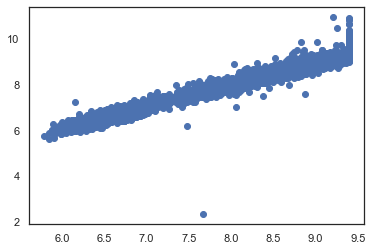

In [60]:
y_pred = lr.predict(test_data)
plt.scatter(y_test['log_price'], y_pred)
plt.show()

In [61]:
for i,j in np.array(lr.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-4.38) * Intercept + (-1.25) * carat + (0.02) * cut + (0.08) * color + (0.12) * clarity + (0.06) * depth + (0.01) * table + (0.83) * x + (0.48) * y + (0.23) * z + 